In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

PATH80 = "./../logs/hedgehog_80_exp/"
PATH200 = "./../logs/hedgehog200/"
RAN10_200 = "./../logs/random_tests_10_to_200_v7.log"
RAN1_36="./../logs/random_tests_1_to_36_v7.log"


In [3]:
allSets80 =[]
maxValues80 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
minValues80 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
avgValues80 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
stdValues80 =  pd.DataFrame(index=range(1,36), columns = ["Accuracy"])
for i in range(1,36):
    s= pd.DataFrame( columns = ["Genes", "Accuracy"])
    count = 0
    with open(PATH80 + 'hh_'+str(i)+'_gene_accuracy.txt' , "r") as f:
        for line in f:
            (key, val) = line.split("\t")
            val =val.replace("\n", "")
            key = key.replace(",)",")")
            s.loc[count,"Genes"] = key
            s.loc[count,"Accuracy"] = val
            count += 1
        allSets80.append(s)
        #Add MAX
        maxValues80.loc[i,"Genes"]= s.max()["Genes"]
        maxValues80.loc[i,"Accuracy"] = float(s.max()["Accuracy"])
        #Add Min
        minValues80.loc[i,"Genes"]= s.min()["Genes"]
        minValues80.loc[i,"Accuracy"] = float(s.min()["Accuracy"])
        #Add Std
        vals = [float(x) for x in s["Accuracy"]]
        stdValues80.loc[i,"Accuracy"] =stats.sem(vals)
        #Avg
        avgValues80.loc[i,"Accuracy"] = np.mean(vals)

In [4]:
allSets200 =[]
maxValues200 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
minValues200 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
stdValues200 =  pd.DataFrame(index=range(1,36), columns = ["Accuracy"])
avgValues200 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
for i in range(1,36):
    s= pd.DataFrame( columns = ["Genes", "Accuracy"])
    count = 0
    with open(PATH200 + 'hh_'+str(i)+'_gene_accuracy.txt' , "r") as f:
        for line in f:
            (key, val) = line.split("\t")
            val =val.replace("\n", "")
            key = key.replace(",)",")")
            s.loc[count,"Genes"] = key
            s.loc[count,"Accuracy"] = val
            count += 1
        allSets200.append(s)
        #Add MAX
        maxValues200.loc[i,"Genes"]= s.max()["Genes"]
        maxValues200.loc[i,"Accuracy"] = float(s.max()["Accuracy"])
        #Add Min
        minValues200.loc[i,"Genes"]= s.min()["Genes"]
        minValues200.loc[i,"Accuracy"] = float(s.min()["Accuracy"])
        #Add Std
        vals = [float(x) for x in s["Accuracy"]]
        stdValues200.loc[i,"Accuracy"] =stats.sem(vals)
        #Avg
        avgValues200.loc[i,"Accuracy"] = np.mean(vals)

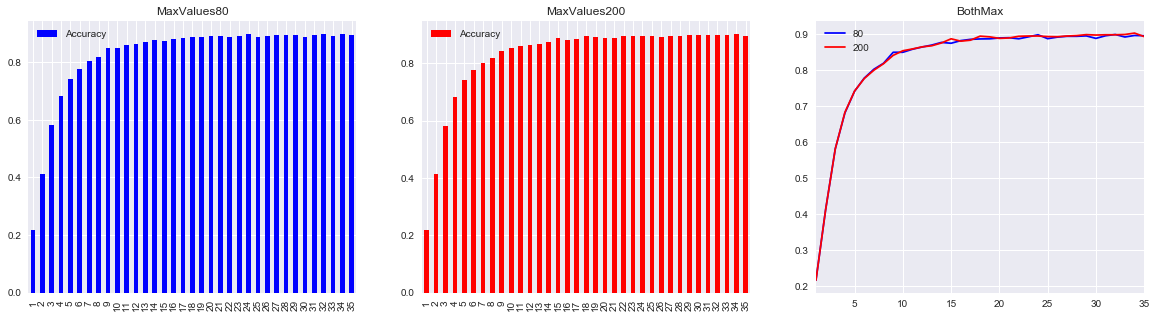

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

maxValues80.plot(x= maxValues80.index.values , y="Accuracy",color="blue",ax=axes[0],title="MaxValues80",kind="bar")
maxValues200.plot(x= maxValues200.index.values , y="Accuracy",color="red", ax=axes[1],title="MaxValues200",kind="bar")
ax = maxValues80.plot(x= maxValues80.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothMax",label="80")
maxValues200.plot(x= maxValues200.index.values , y="Accuracy",color="red", ax=ax,label="200")

plt.show()

In [6]:
#put in the variation in these graphs, standard error and standard deviation plots, need last plot with stan error, poitns would be the avg

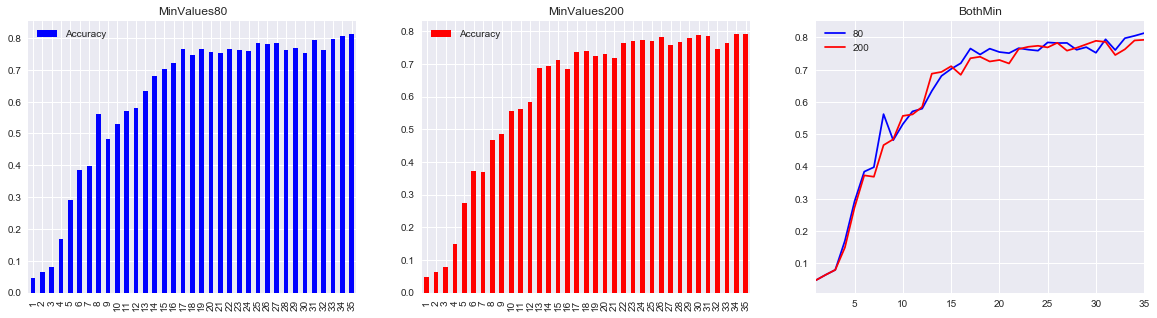

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

minValues80.plot(x= minValues80.index.values , y="Accuracy",color="blue",ax=axes[0],title="MinValues80",kind="bar")
minValues200.plot(x= minValues200.index.values , y="Accuracy",color="red", ax=axes[1],title="MinValues200",kind="bar")

ax = minValues80.plot(x= minValues80.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothMin",label="80")
minValues200.plot(x= minValues200.index.values , y="Accuracy",color="red", ax=ax,label="200")

plt.show()

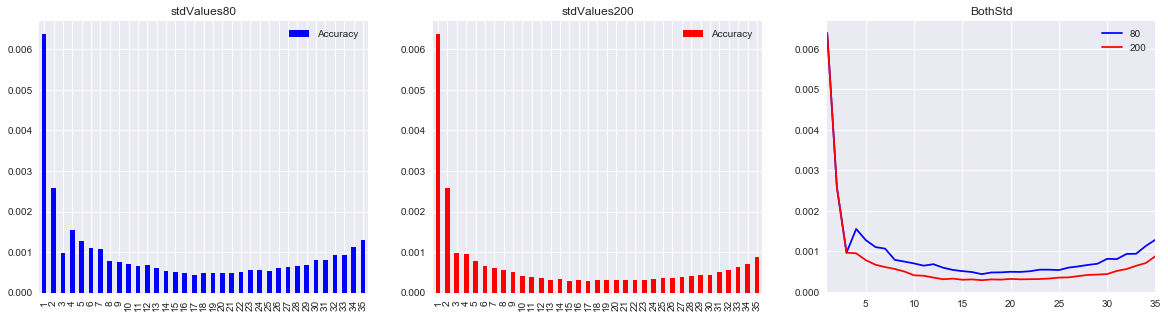

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

stdValues80.plot(x= stdValues80.index.values , y="Accuracy",color="blue",ax=axes[0],title="stdValues80",kind="bar")
stdValues200.plot(x= stdValues200.index.values , y="Accuracy",color="red", ax=axes[1],title="stdValues200",kind="bar")

ax = stdValues80.plot(x= stdValues80.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothStd",label="80")
stdValues200.plot(x= stdValues200.index.values , y="Accuracy",color="red", ax=ax,label="200")

plt.show()

In [9]:
#Todo Make a HeatMap across Samples
#Genes appearance in Combos

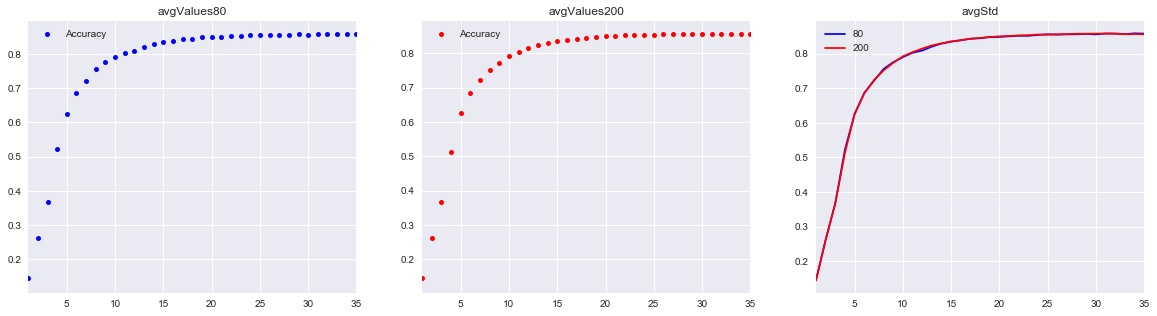

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

avgValues80.plot(x= avgValues80.index.values , y="Accuracy",yerr=stdValues80,color="black",ax=axes[0],title="avgValues80",markersize=10,linestyle='None',marker='.',markerfacecolor='blue')

avgValues200.plot(x= avgValues200.index.values , y="Accuracy",yerr=stdValues200,color="black", ax=axes[1],title="avgValues200",markersize=10,linestyle='None',marker='.',markerfacecolor='red')

ax = avgValues80.plot(x= avgValues80.index.values , y="Accuracy",yerr=stdValues80,color="blue",ax=axes[2],title="avgStd",label="80")
avgValues200.plot(x= avgValues200.index.values , y="Accuracy",yerr=stdValues200,color="red", ax=ax,label="200")

plt.show()

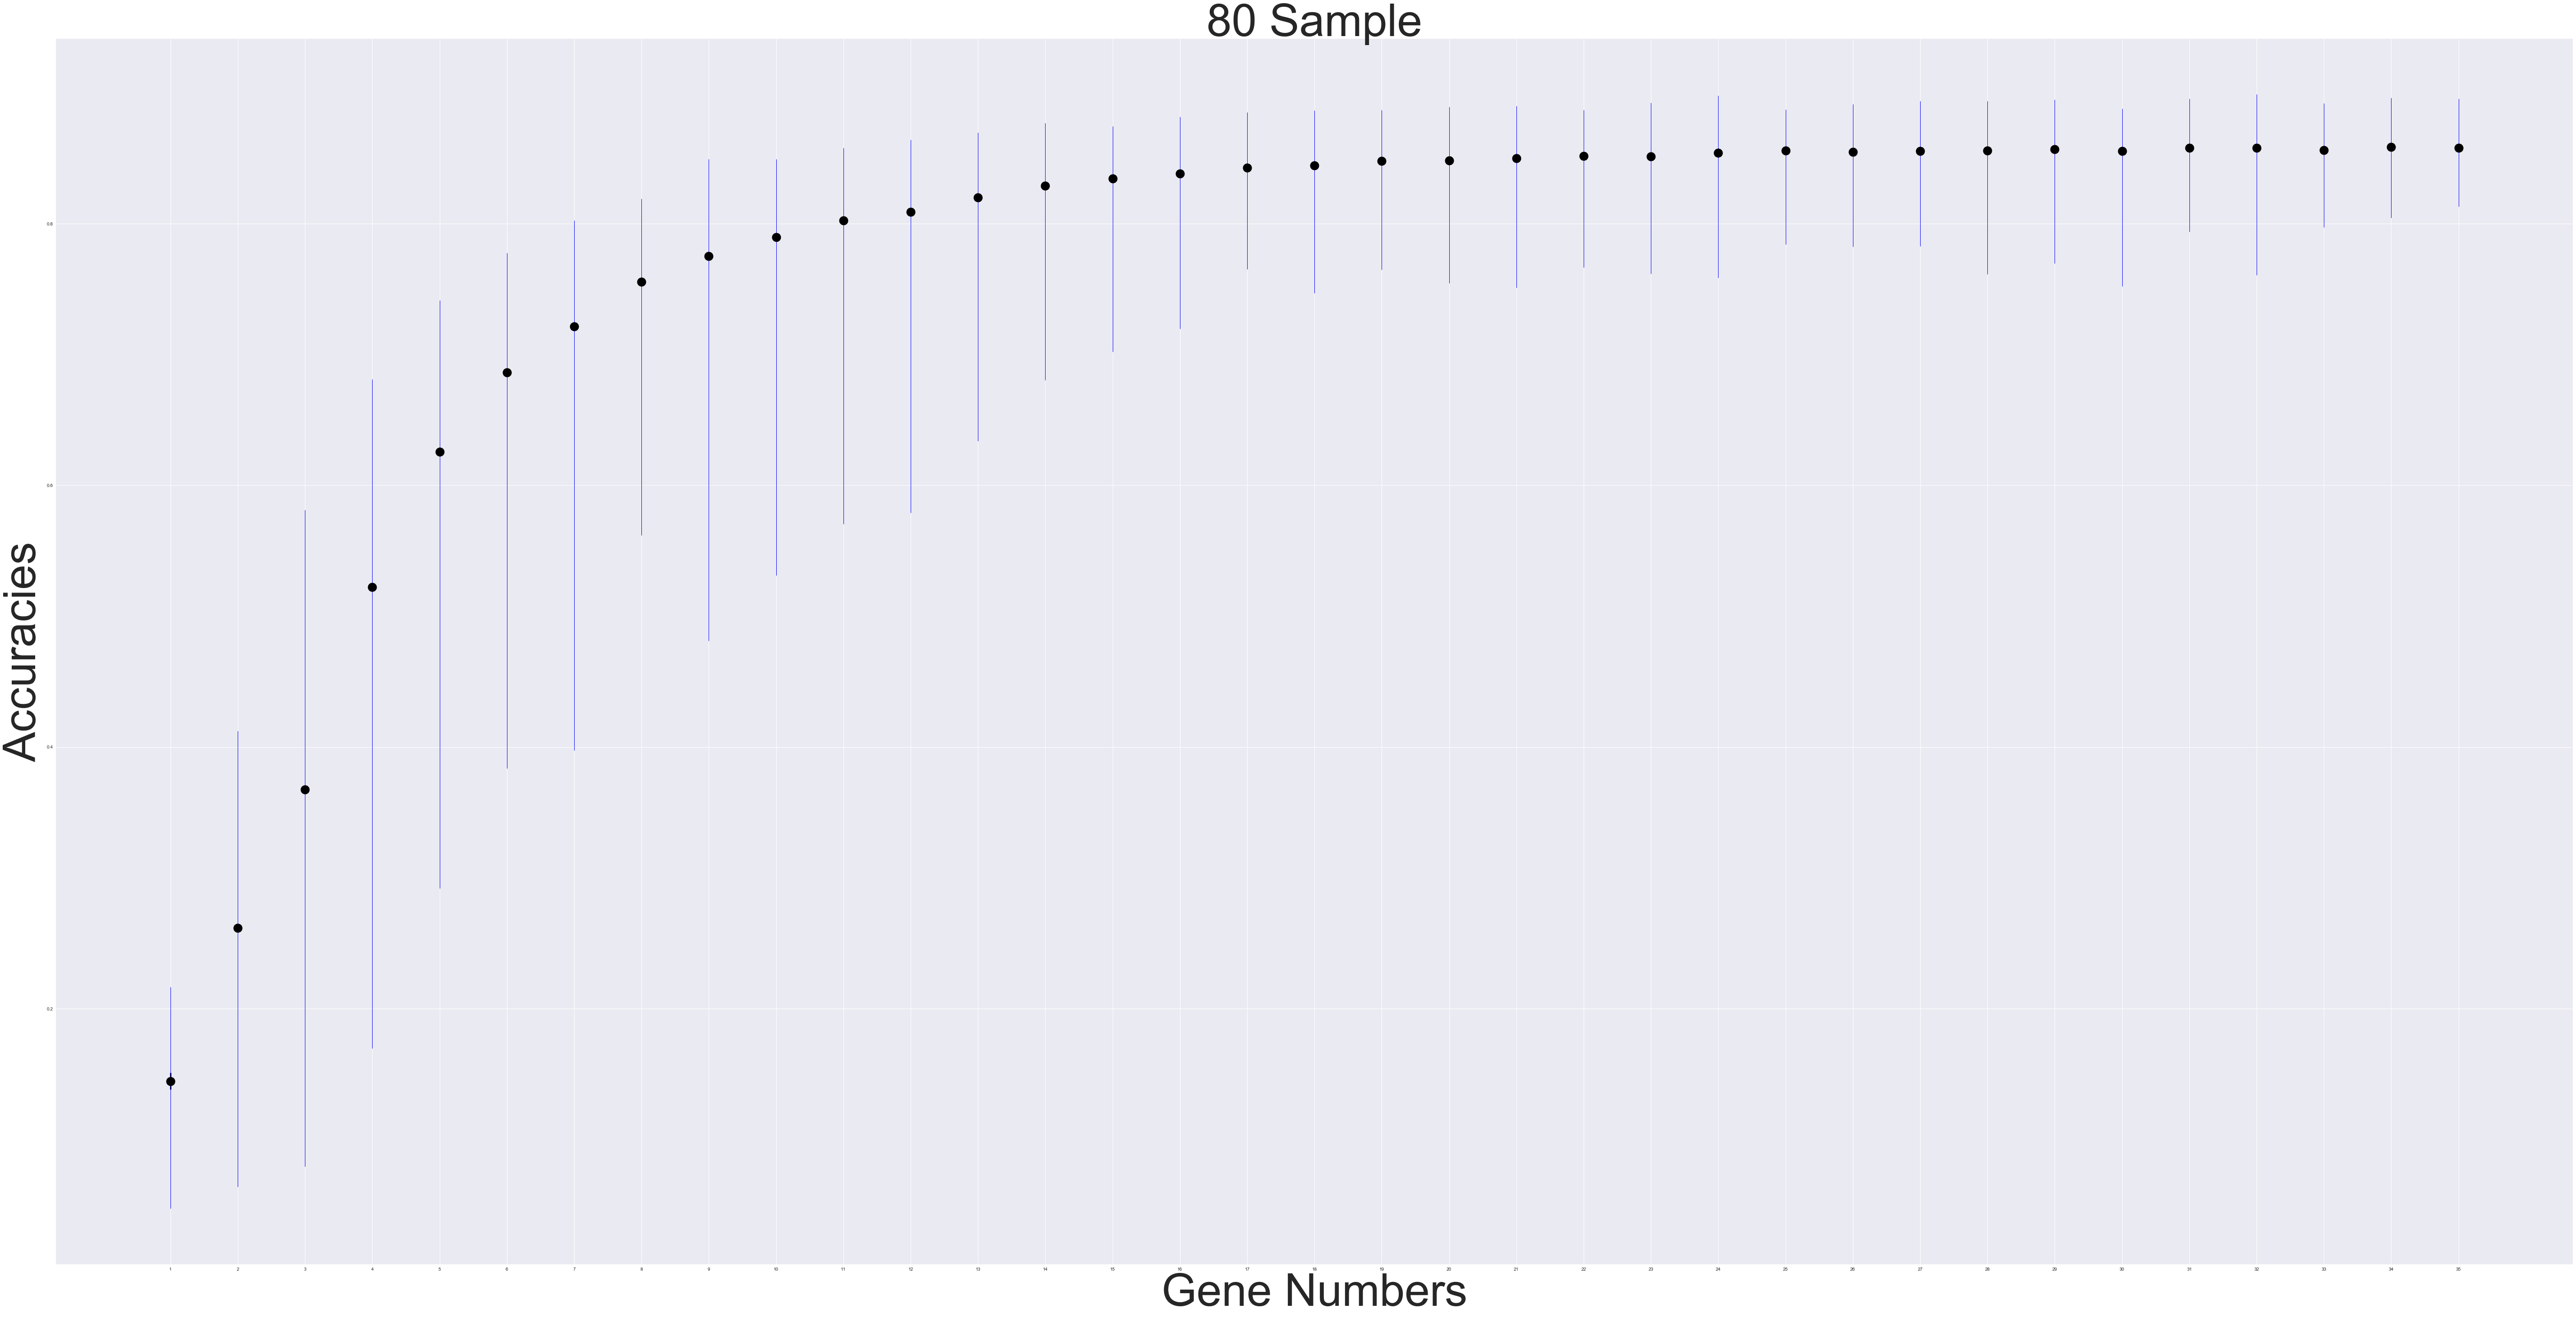

In [11]:
plt.figure(figsize=(100,50))
plt.errorbar(range(1,36), avgValues80["Accuracy"].values, stdValues80["Accuracy"].values, fmt='ok', lw=3, \
            markersize=20)
plt.errorbar(range(1,36), avgValues80["Accuracy"].values, [avgValues80["Accuracy"].values - minValues80["Accuracy"].values, \
                                                        maxValues80["Accuracy"].values - avgValues80["Accuracy"].values], \
                                                        fmt = '.k', ecolor = 'blue', lw=1)

plt.rc('ytick', labelsize=50)    # fontsize of the tick labels
plt.xticks(range(1,36))
plt.xlabel("Gene Numbers",fontsize=100)
plt.ylabel("Accuracies",fontsize=100)
plt.title("80 Sample",fontsize=100)

plt.show()


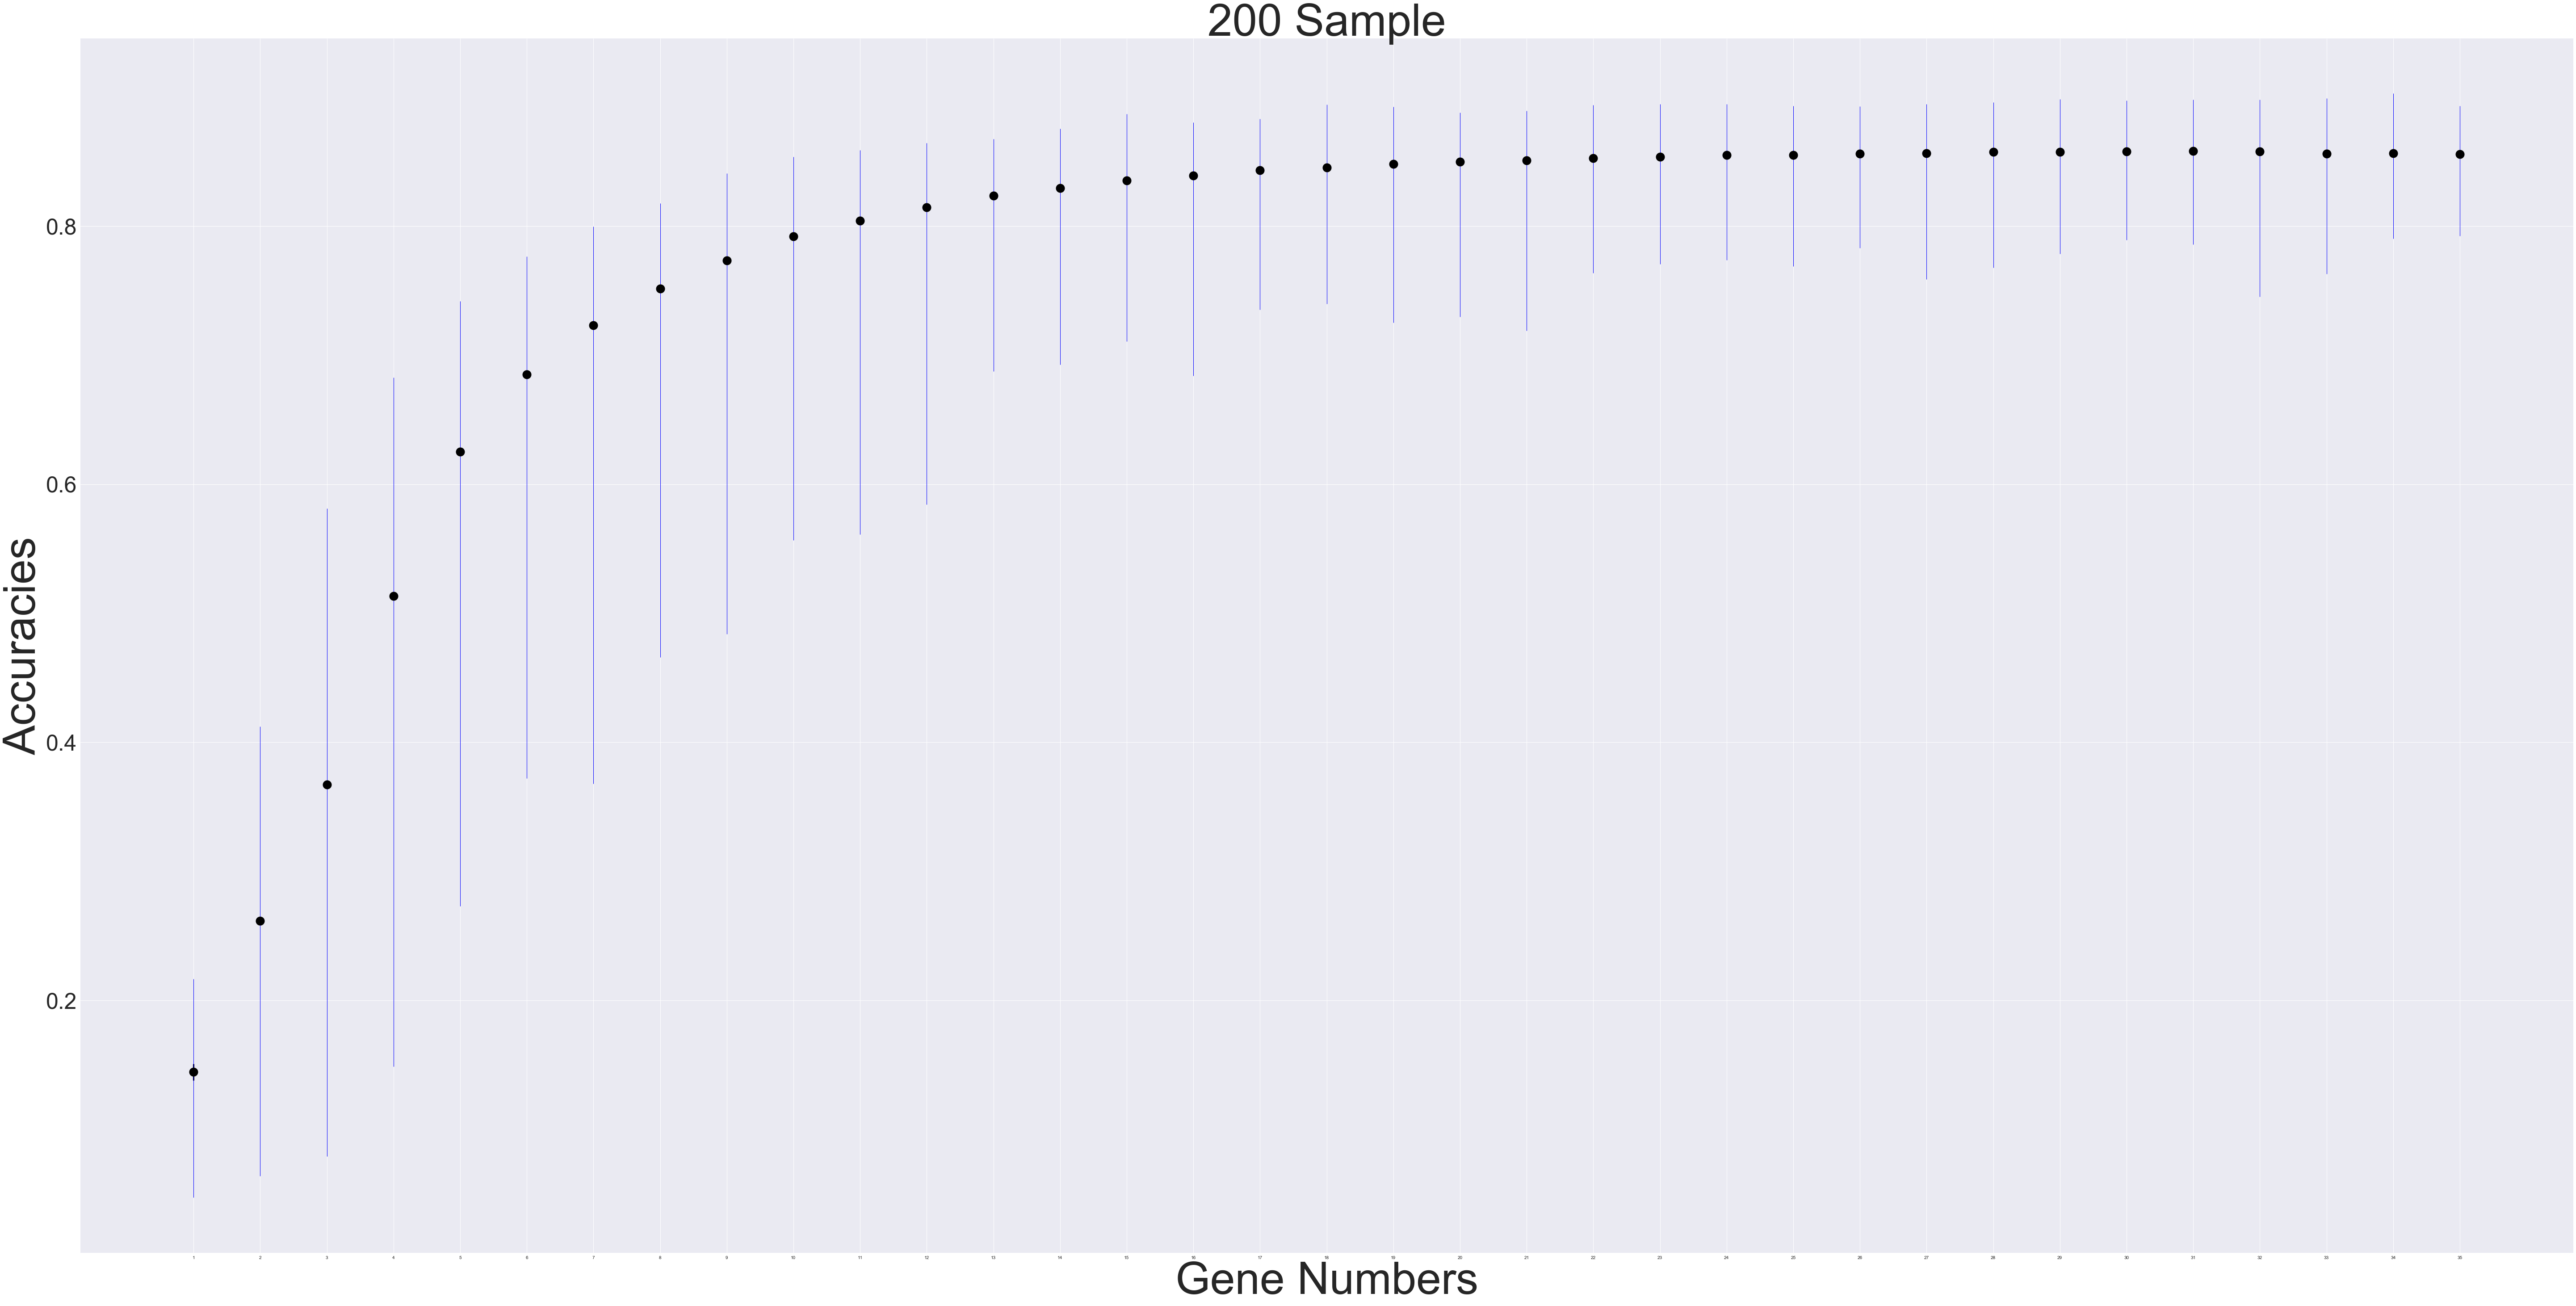

In [12]:
plt.figure(figsize=(100,50))
plt.errorbar(range(1,36), avgValues200["Accuracy"].values, stdValues200["Accuracy"].values, fmt='ok', lw=3, \
            markersize=20)
plt.errorbar(range(1,36), avgValues200["Accuracy"].values, [avgValues200["Accuracy"].values - minValues200["Accuracy"].values, \
                                                        maxValues200["Accuracy"].values - avgValues200["Accuracy"].values], \
                                                        fmt = '.k', ecolor = 'blue', lw=1)
plt.rc('ytick', labelsize=50)    # fontsize of the tick labels
plt.xticks(range(1,36))
plt.xlabel("Gene Numbers",fontsize=100)
plt.ylabel("Accuracies",fontsize=100)
plt.title("200 Sample",fontsize=100)

plt.show()


In [13]:
genes80 = pd.DataFrame(index=range(1,36))
genes200 = pd.DataFrame(index=range(1,36))

In [14]:
for gene in allSets80[0]['Genes']:
    gene = gene.replace("('","")
    gene = gene.replace("')","")
    genes80.loc[1,gene] = 1
    genes200.loc[1,gene] = 1
    
genes200.loc[1] = genes200.loc[1].div(36)
genes80.loc[1] = genes80.loc[1].div(36)

In [15]:
for i in range(1,len(allSets80)):
    count = 0
    for combo in allSets80[i]["Genes"]:
        array = eval(combo)
        for gene in genes80.columns.values:
            if gene in array:
                if np.isnan(genes80.loc[i+1,gene]):
                    genes80.loc[i+1,gene] = 1
                else:
                    genes80.loc[i+1,gene] +=1
                    
    #normalize
    count = genes80.loc[i+1].sum()
    genes80.loc[i+1] = genes80.loc[i+1].div(count)

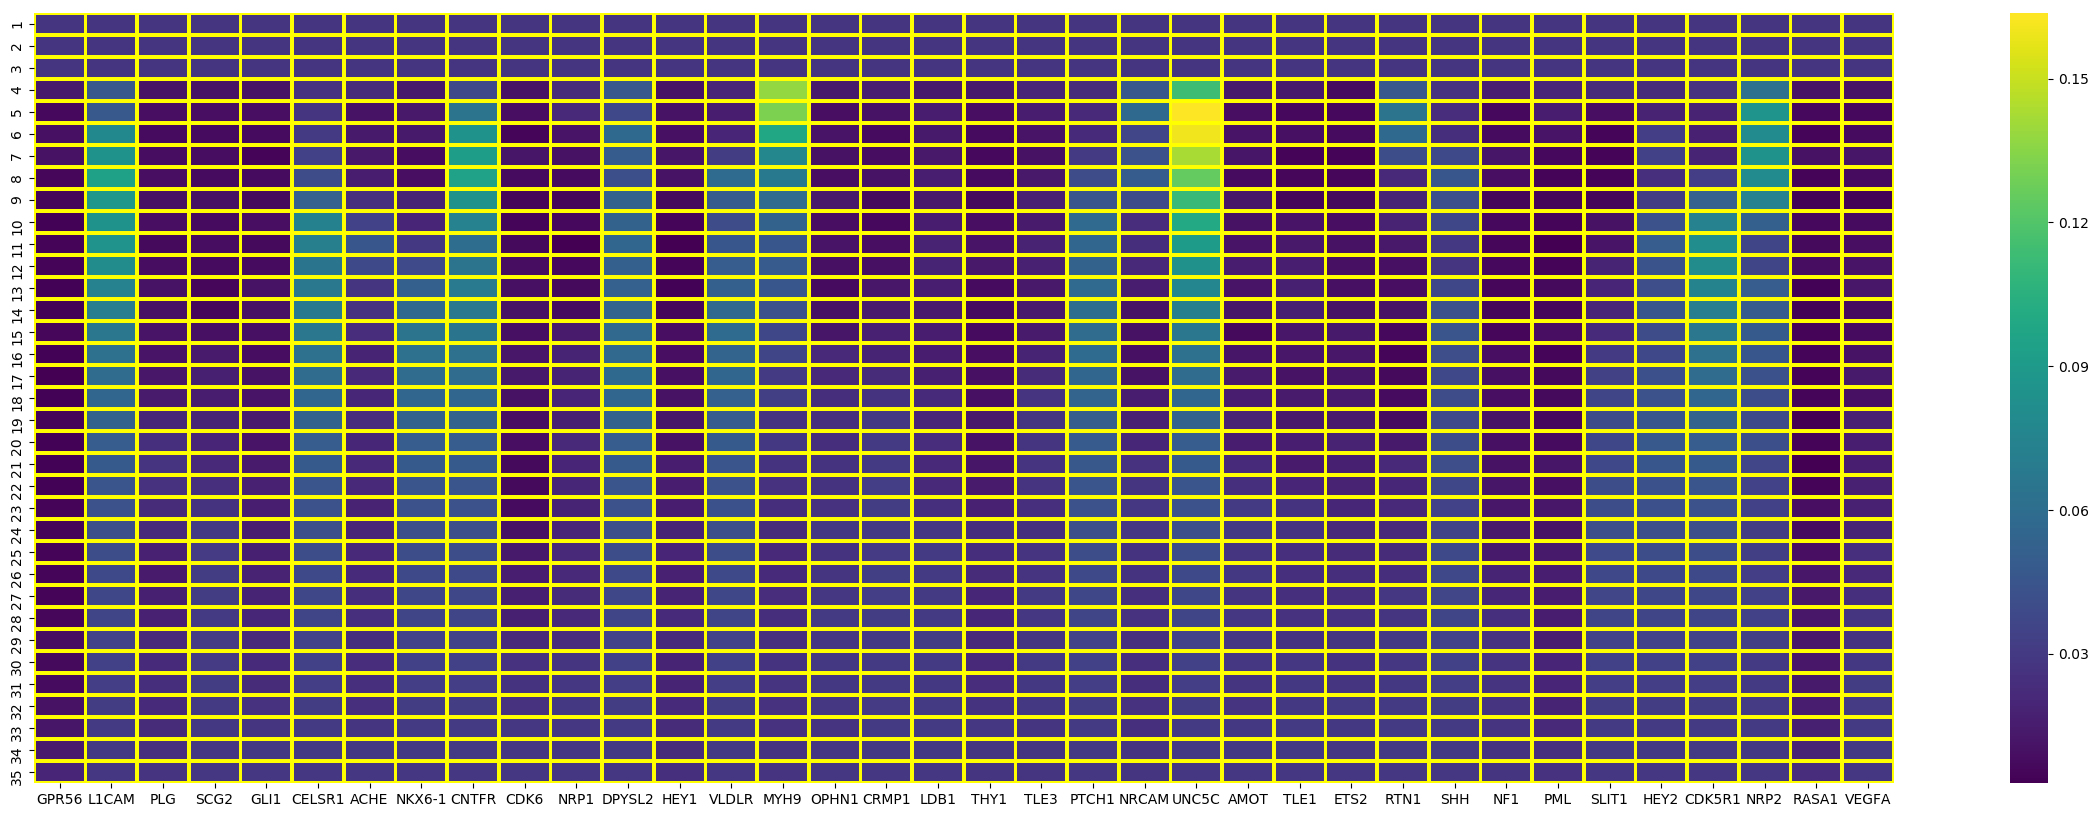

In [16]:
sns.reset_defaults()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(data=genes80,cmap='viridis',linewidths=2, linecolor='yellow')

#add in accuracies, compare trends, delta to random

In [17]:
genes80

,GPR56,L1CAM,PLG,SCG2,GLI1,CELSR1,ACHE,NKX6-1,CNTFR,CDK6,...,RTN1,SHH,NF1,PML,SLIT1,HEY2,CDK5R1,NRP2,RASA1,VEGFA
1,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
2,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
3,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
4,0.013636,0.046970,0.010606,0.010606,0.010606,0.025758,0.022727,0.013636,0.037879,0.010606,...,0.046970,0.025758,0.016667,0.019697,0.022727,0.022727,0.025758,0.062121,0.010606,0.010606
5,0.006250,0.047422,0.008672,0.008672,0.008672,0.028047,0.011094,0.013516,0.064375,0.008672,...,0.064375,0.023203,0.006250,0.015938,0.008672,0.018359,0.018359,0.086172,0.006250,0.006250
6,0.009512,0.077750,0.007444,0.007444,0.007444,0.030190,0.013648,0.013648,0.083954,0.005376,...,0.057072,0.023987,0.007444,0.011580,0.005376,0.032258,0.017783,0.079818,0.005376,0.007444
7,0.010073,0.084432,0.008303,0.008303,0.004762,0.033089,0.013614,0.008303,0.091514,0.011844,...,0.040171,0.038400,0.011844,0.006532,0.004762,0.033089,0.018926,0.084432,0.010073,0.011844
8,0.005858,0.094054,0.008952,0.007405,0.007405,0.039898,0.015141,0.008952,0.095601,0.007405,...,0.021331,0.046088,0.008952,0.004310,0.004310,0.024425,0.032162,0.080128,0.004310,0.007405
9,0.005342,0.087759,0.009463,0.009463,0.006716,0.052045,0.024573,0.019078,0.085012,0.005342,...,0.019078,0.042430,0.005342,0.005342,0.005342,0.031441,0.052045,0.074023,0.003968,0.003968
10,0.003704,0.083951,0.008642,0.007407,0.008642,0.072840,0.034568,0.019753,0.074074,0.004938,...,0.018519,0.037037,0.006173,0.004938,0.009877,0.043210,0.074074,0.051852,0.006173,0.007407


In [18]:
for i in range(1,len(allSets200)):
    count = 0
    for combo in allSets200[i]["Genes"]:
        array = eval(combo)
        for gene in genes200.columns.values:
            if gene in array:
                if np.isnan(genes200.loc[i+1,gene]):
                    genes200.loc[i+1,gene] = 1
                else:
                    genes200.loc[i+1,gene] +=1
                    
    #normalize
    count = genes200.loc[i+1].sum()
    genes200.loc[i+1] = genes200.loc[i+1].div(count)

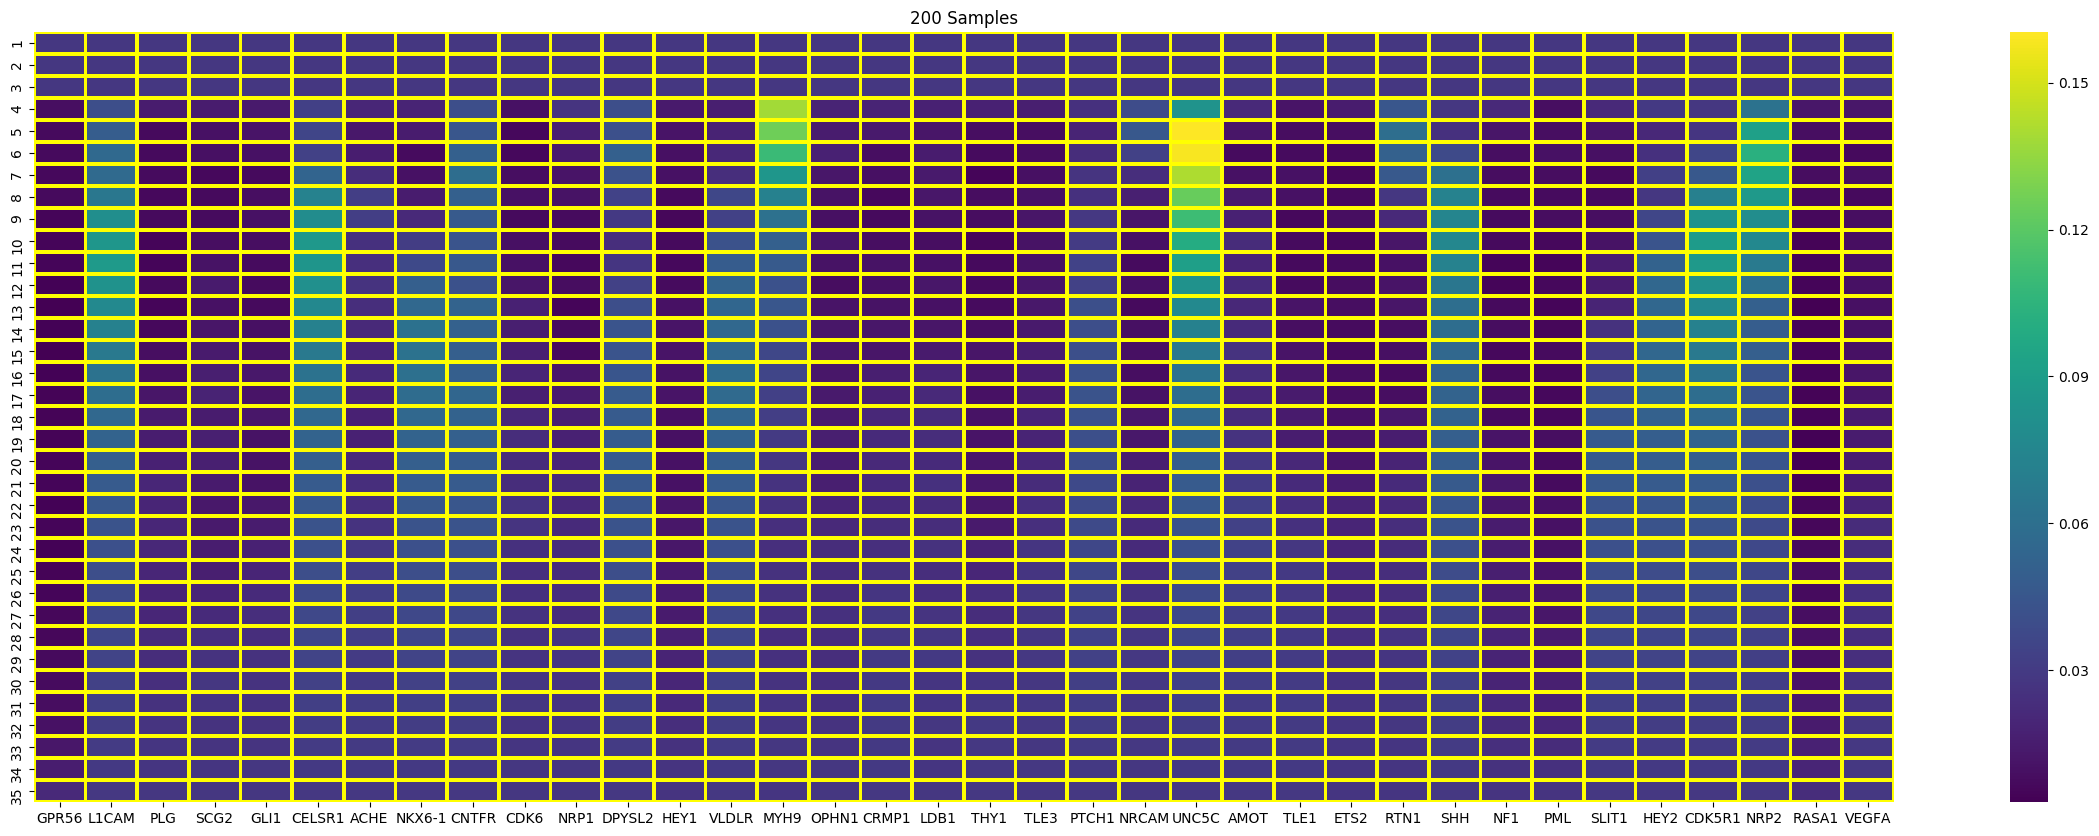

In [19]:
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(data=genes200,cmap='viridis',linewidths=2, linecolor='yellow')
plt.title("200 Samples")
plt.show()

In [20]:
genes200

,GPR56,L1CAM,PLG,SCG2,GLI1,CELSR1,ACHE,NKX6-1,CNTFR,CDK6,...,RTN1,SHH,NF1,PML,SLIT1,HEY2,CDK5R1,NRP2,RASA1,VEGFA
1,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
2,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
3,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
4,0.008788,0.040303,0.014848,0.014848,0.013636,0.033030,0.019697,0.018485,0.040303,0.010000,...,0.045152,0.028182,0.020909,0.008788,0.020909,0.029394,0.028182,0.062121,0.012424,0.012424
5,0.007219,0.048875,0.007219,0.010125,0.011094,0.035312,0.013031,0.014969,0.045000,0.006250,...,0.059531,0.024656,0.012063,0.009156,0.012063,0.020781,0.027563,0.091500,0.009156,0.008188
6,0.006989,0.056183,0.006989,0.009409,0.010215,0.033602,0.015860,0.007796,0.050538,0.006183,...,0.051344,0.038441,0.008602,0.010215,0.009409,0.024731,0.036022,0.102957,0.007796,0.006989
7,0.006157,0.057071,0.007552,0.006157,0.006854,0.052886,0.022896,0.010342,0.058466,0.008947,...,0.046609,0.060558,0.008249,0.008249,0.006854,0.032660,0.045911,0.094036,0.008249,0.009644
8,0.006749,0.065265,0.006139,0.006749,0.008577,0.072579,0.031740,0.015282,0.050636,0.009796,...,0.028083,0.071970,0.007358,0.007358,0.007358,0.028083,0.070751,0.087208,0.007358,0.006749
9,0.005051,0.080267,0.007215,0.007756,0.009921,0.078644,0.031566,0.021284,0.046717,0.007215,...,0.021284,0.074856,0.007756,0.008297,0.008838,0.035895,0.083514,0.079726,0.006674,0.008838
10,0.005163,0.085896,0.005163,0.009053,0.009053,0.086869,0.025103,0.030939,0.043584,0.009540,...,0.011972,0.075683,0.007108,0.006135,0.010513,0.044070,0.088814,0.076655,0.004676,0.008567


In [21]:
r= np.loadtxt(RAN1_36, dtype=np.float32 )
num =[]
avg = []
std = []

for i in range(len(r)):
    num.append(r[i][0])
    avg.append(r[i][1])
    std.append(r[i][2])
    
num = np.asarray(num)
avg=np.asarray(avg)
std = np.asarray(std)

In [25]:
len(avg)

36

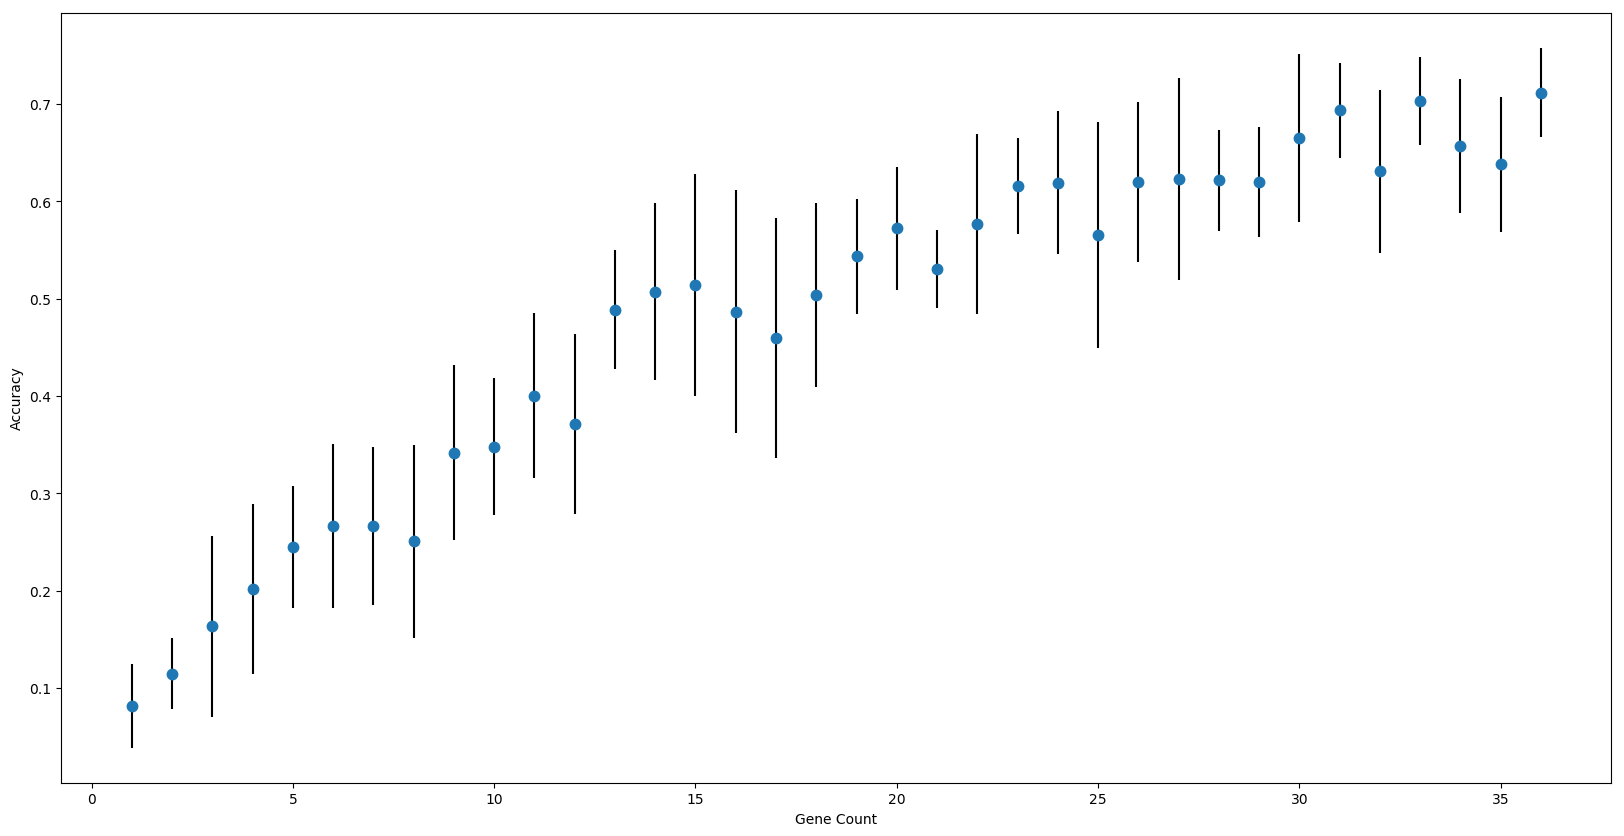

In [22]:
plt.figure(figsize=(20,10))
plt.errorbar(num, avg, std, linestyle='None', marker='.', markersize=15, ecolor="black")
plt.xlabel("Gene Count")
plt.ylabel("Accuracy")
plt.show()
avgValues80.plot(x= avgValues80.index.values , y="Accuracy",yerr=stdValues80,color="black",ax=axes[0],title="avgValues80",markersize=10,linestyle='None',marker='.',markerfacecolor='blue')


AttributeError: 'Line2D' object has no attribute 'set_'

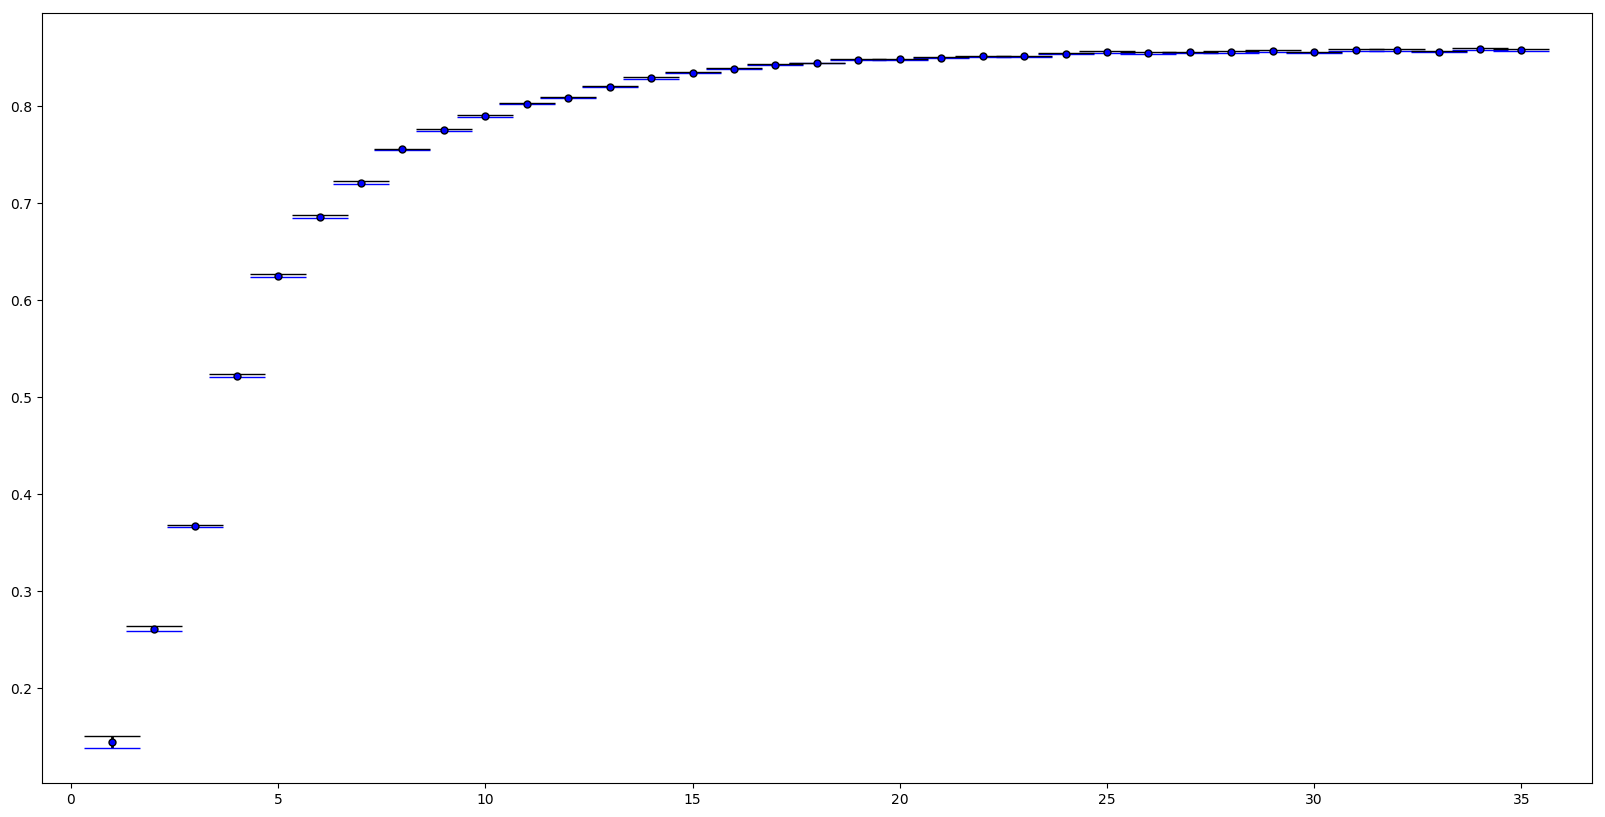

In [23]:
plt.figure(figsize=(20,10))
avg80 = avgValues80["Accuracy"].values
std80 = stdValues80["Accuracy"].values
max80 = maxValues80["Accuracy"].values
min80 = minValues80["Accuracy"].values
(_, caps, _) = plt.errorbar(range(1,36), avg80, std80, fmt='ok', lw=2,\
            markersize=5,markerfacecolor='blue', capsize=20)

for cap in caps:
    cap.set_color('blue')
    cap.set_
    cap.set_markeredgewidth(.5)
# plt.errorbar(range(1,36), avg80, [avg80 - min80, max80 - avg80], fmt='.k', lw=1, \
#             markersize=5,markerfacecolor='blue')

plt.errorbar(num, avg, std, linestyle='None', marker='.', markersize=10, ecolor="black", lw=1)

plt.show()
